<a href="https://colab.research.google.com/github/SnitikaDash/Data-Science-Projects/blob/main/Project_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

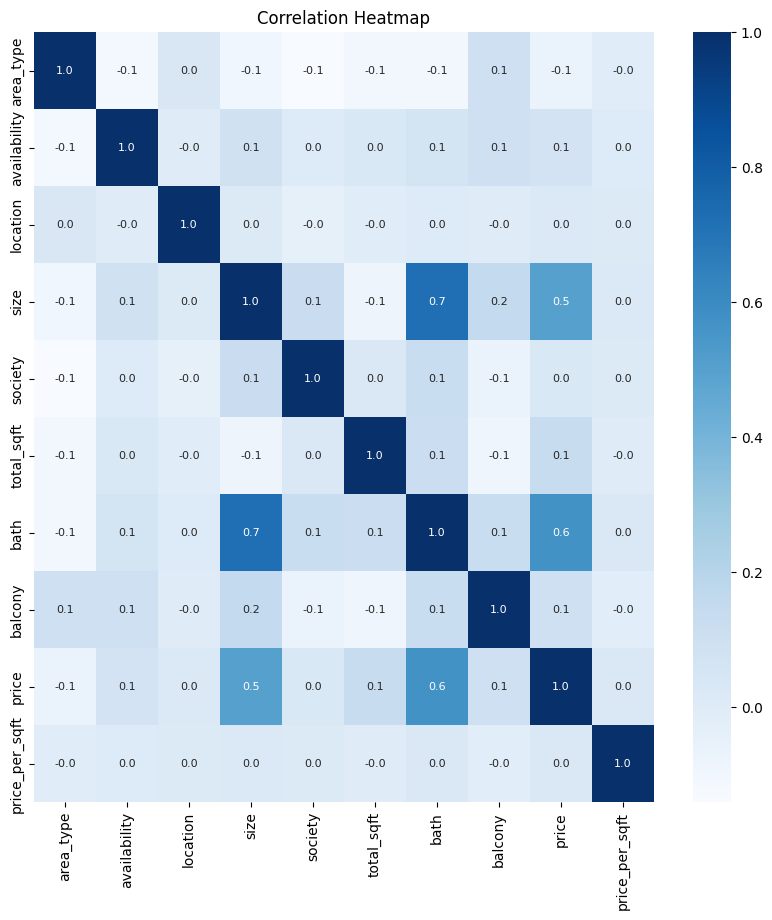

Mean Absolute Error: 2.7131945571436424
Mean Squared Error: 109.61228156934745
Root Mean Squared Error: 10.469588414515036


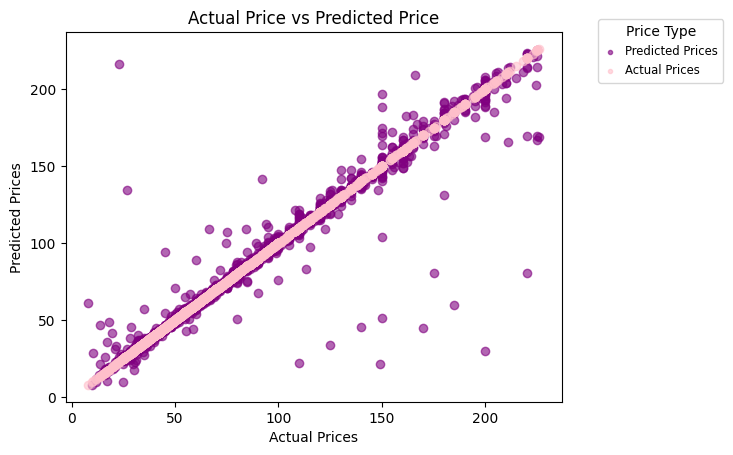

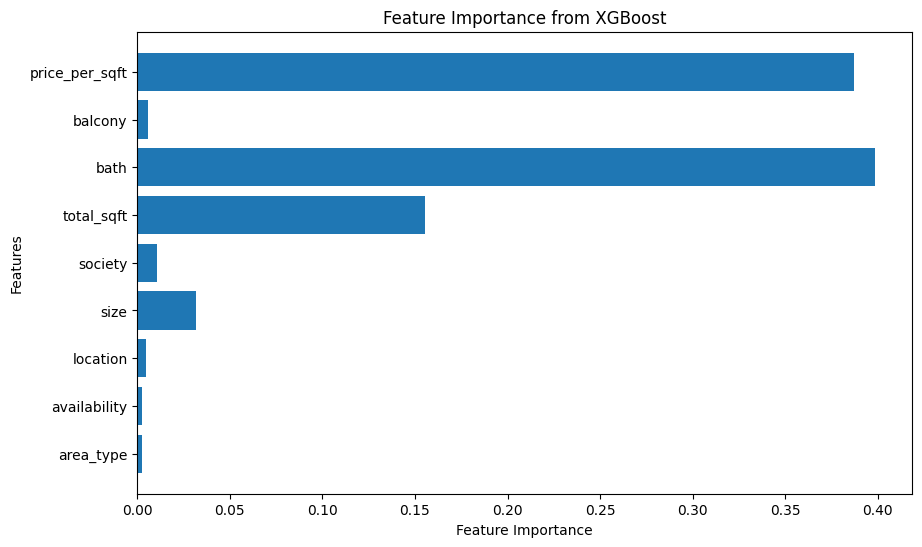

<Figure size 640x480 with 0 Axes>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle

# Load dataset
dataset = pd.read_csv('Bengaluru_House_Data.csv')

# Data Cleaning
dataset.drop_duplicates(inplace=True)

# Fill missing values in numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(0)

# Fill missing values in categorical columns with 'unknown'
categorical_columns = dataset.select_dtypes(include=['object']).columns
dataset[categorical_columns] = dataset[categorical_columns].fillna('unknown')

# Handle outliers for 'price' using IQR (Interquartile Range)
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset['price'] >= (Q1 - 1.5 * IQR)) & (dataset['price'] <= (Q3 + 1.5 * IQR))]

# Feature Engineering: Add price per square foot
dataset['price_per_sqft'] = dataset['price'] / pd.to_numeric(dataset['total_sqft'], errors='coerce')
dataset['price_per_sqft'] = dataset['price_per_sqft'].fillna(0)

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

# Heatmap to understand correlations
plt.figure(figsize=(10, 10))
correlation = dataset.corr()
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# Split the data
X = dataset.drop(['price'], axis=1)
Y = dataset['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize the model
model = XGBRegressor()

# Train the model
model.fit(X_train, Y_train)

# Evaluate the model
predictions = model.predict(X_test)
mae = metrics.mean_absolute_error(Y_test, predictions)
mse = metrics.mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualize Actual vs Predicted Prices
plt.scatter(Y_test, predictions, color='purple', alpha=0.6, label='Predicted Prices')
plt.scatter(Y_test, Y_test, color='pink', alpha=0.6, label='Actual Prices')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.legend(
    title="Price Type",
    loc='upper center',
    bbox_to_anchor=(1.2, 1.05),
    ncol=1,
    fontsize='small',   # Reduces font size
    borderpad=0.5,      # Reduces the space between the text and the box
    handlelength=1,     # Adjusts the length of the legend handles (the lines/symbols next to text)
    markerscale=0.5     # Reduces the size of the markers in the legend
)
plt.show()

# Save the trained model
with open('house_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost")
plt.show()

